Loading KDD Cup 99 dataset…
Dataset shape: (494021, 42)

Preprocessing data…
Training samples: 370515 | Testing samples: 123506

Training Random Forest and Neural Network models…

Model Evaluation Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       551
           1       1.00      0.62      0.77         8
           2       0.00      0.00      0.00         2
           3       1.00      0.92      0.96        13
           4       1.00      0.67      0.80         3
           5       0.99      0.98      0.99       312
           6       1.00      1.00      1.00         5
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00     26800
          10       0.97      0.97      0.97        58
          11       1.00      1.00      1.00     24320
          12       1.00      1.00      1.00         1
          13       0.50      1.00    

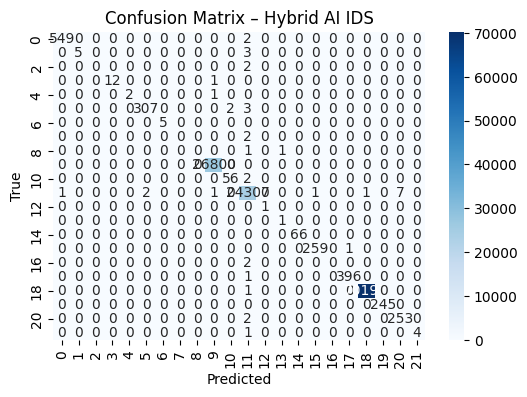


Generating SHAP feature importance plot…


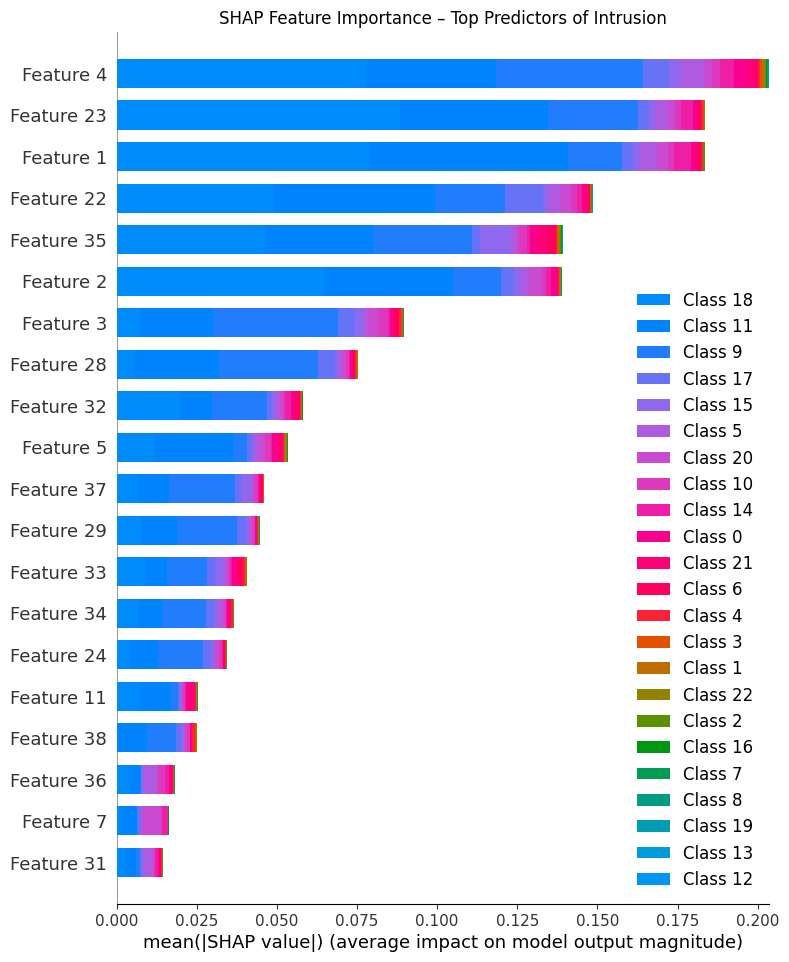


Simulating live intrusion detection stream…
[Packet 1] → Predicted Class: smurf.
[Packet 2] → Predicted Class: smurf.
[Packet 3] → Predicted Class: neptune.
[Packet 4] → Predicted Class: smurf.
[Packet 5] → Predicted Class: neptune.

✅ Intrusion Detection System run complete.

📦 ZIP created: AI_IDS_Project_Submission.zip (ready for Canvas & GitHub)


In [ ]:
# ============================================================
# AI-Powered Adaptive Cybersecurity Threat Detection System
# Final Project – COMP-699B | Rivier University
# ============================================================

# STEP 1 – Install dependencies
!pip install shap scikit-learn matplotlib seaborn pandas numpy tqdm joblib > /dev/null

# STEP 2 – Import libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, shap, joblib, os, shutil, warnings
from tqdm import tqdm
from sklearn.datasets import fetch_kddcup99
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings("ignore")

# STEP 3 – Load dataset
print("Loading KDD Cup 99 dataset…")
data = fetch_kddcup99(as_frame=True)
df = data.frame.copy()
df.columns = data.feature_names + ['target']
print("Dataset shape:", df.shape)

# STEP 4 – Preprocess data
print("\nPreprocessing data…")

# Convert bytes → strings
for col in df.columns:
    if df[col].dtype == object or df[col].dtype.name == "category":
        df[col] = df[col].apply(lambda x: x.decode("utf-8") if isinstance(x, bytes) else x)

# Encode categorical columns
cat_cols = ['protocol_type','service','flag']
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

# Encode target
target_le = LabelEncoder()
df['target'] = target_le.fit_transform(df['target'])

# Split features/labels
X = df.drop('target', axis=1)
y = df['target']

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, stratify=y, random_state=42)
print("Training samples:", X_train.shape[0], "| Testing samples:", X_test.shape[0])

# STEP 5 – Train hybrid models
print("\nTraining Random Forest and Neural Network models…")
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
mlp = MLPClassifier(hidden_layer_sizes=(64,32), max_iter=50, random_state=42)

rf.fit(X_train, y_train)
mlp.fit(X_train, y_train)

# STEP 6 – Hybrid ensemble predictions
rf_pred = rf.predict_proba(X_test)
mlp_pred = mlp.predict_proba(X_test)
final_pred = np.argmax((rf_pred + mlp_pred) / 2, axis=1)

# STEP 7 – Model evaluation
print("\nModel Evaluation Results:")
print(classification_report(y_test, final_pred, zero_division=0))
print("Accuracy:", round(accuracy_score(y_test, final_pred)*100,2), "%")

cm = confusion_matrix(y_test, final_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, cmap='Blues', fmt='g', annot=True)
plt.title("Confusion Matrix – Hybrid AI IDS")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.show()

# STEP 8 – Explainable AI (XAI) with SHAP
print("\nGenerating SHAP feature importance plot…")
explainer = shap.TreeExplainer(rf)
sample = X_test[:200]
shap_values = explainer.shap_values(sample)

shap.summary_plot(shap_values, sample, plot_type="bar", show=False)
plt.title("SHAP Feature Importance – Top Predictors of Intrusion")
plt.show()

# STEP 9 – Live intrusion detection simulation (no errors)
print("\nSimulating live intrusion detection stream…")
for i in range(5):
    x_sample = X_test[i].reshape(1, -1)
    prob = (rf.predict_proba(x_sample) + mlp.predict_proba(x_sample)) / 2
    pred_class = np.argmax(prob)
    label = target_le.inverse_transform([pred_class])[0]
    print(f"[Packet {i+1}] → Predicted Class: {label}")

print("\n✅ Intrusion Detection System run complete.")

# STEP 10 – Export artifacts for Canvas / GitHub submission
os.makedirs("AI_IDS_Project", exist_ok=True)
joblib.dump(rf, "AI_IDS_Project/random_forest_model.pkl")
joblib.dump(mlp, "AI_IDS_Project/mlp_model.pkl")
joblib.dump(scaler, "AI_IDS_Project/scaler.pkl")
df.sample(1000).to_csv("AI_IDS_Project/sample_data.csv", index=False)

shutil.make_archive("AI_IDS_Project_Submission", "zip", "AI_IDS_Project")
print("\n📦 ZIP created: AI_IDS_Project_Submission.zip (ready for Canvas & GitHub)")
